In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('card transactions.csv')
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df['Merch zip'] = df['Merch zip'].apply(lambda x: "{:.0f}".format(x).zfill(5) if not pd.isnull(x) else x)

In [3]:
df[(df['Merch state'].isnull()) & (df['Merch zip'].notnull())]

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
3258,3259,5142153880,2006-01-14,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,00926,P,2340.00,0
3262,3263,5142154098,2006-01-14,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,00926,P,2387.00,0
3540,3541,5142154098,2006-01-17,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,00926,P,2300.00,0
3642,3643,5142153880,2006-01-17,582582822587,DIGITAL TECHNOLOGY CONTRA,NaN,00926,P,2500.00,0
4969,4970,5142194136,2006-01-24,597597721468,CRISTALIA ACQUISITION COR,NaN,00929,P,83.00,0
...,...,...,...,...,...,...,...,...,...,...
83272,83273,5142193384,2006-10-26,600555303209,EMBASSY SUITES PR,NaN,38117,P,300.00,0
83425,83426,5142193384,2006-10-27,600555303209,EMBASSY SUITES PR,NaN,38117,P,600.00,0
83454,83455,5142193384,2006-10-27,600555303209,EMBASSY SUITES PR,NaN,38117,P,600.00,0
86405,86406,5142194136,2006-11-10,7007631331,AAFES BUCHANAN MAIN STR,NaN,00934,P,184.41,0


In [4]:
data = pd.read_csv('card transactions.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96753 non-null  int64  
 1   Cardnum            96753 non-null  int64  
 2   Date               96753 non-null  object 
 3   Merchnum           93378 non-null  object 
 4   Merch description  96753 non-null  object 
 5   Merch state        95558 non-null  object 
 6   Merch zip          92097 non-null  float64
 7   Transtype          96753 non-null  object 
 8   Amount             96753 non-null  float64
 9   Fraud              96753 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.4+ MB


In [6]:
# only p and remove outlier
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data['Merch zip'] = data['Merch zip'].apply(lambda x: "{:.0f}".format(x).zfill(5) if not pd.isnull(x) else x)
data = data[data['Transtype'] == 'P']
data = data[data['Recnum'] != 52715]
data['Cardnum']=data['Cardnum'].astype('str')
data.sort_values(by = 'Amount',ascending = False)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
47339,47340,5142275225,2006-06-22,NaN,INTERSOL,NaN,NaN,P,47900.00,0
59516,59517,5142138135,2006-08-03,900009045549,KRACKELER SCIENTIFIC,NY,12202,P,30372.46,1
80886,80887,5142152857,2006-10-11,NaN,CANYON ELECTRIC,NV,89102,P,28392.84,1
89673,89674,5142183210,2006-11-29,NaN,CRUCIAL TECH./MICRON,ID,83642,P,27218.00,0
1103,1104,5142189945,2006-01-06,2036100687150,"GE REUTER-STOKES, INC",OH,44087,P,26910.00,0
...,...,...,...,...,...,...,...,...,...,...
47165,47166,5142148452,2006-06-22,930009906224,FEDEX SHP 05/23/10 AB#,TN,38118,P,0.08,0
57855,57856,5142129787,2006-07-30,9108347680000,STAPLES NATIONAL #471,NJ,07606,P,0.02,0
78387,78388,5142236687,2006-09-28,9108233080006,STAPLES #990,CA,90640,P,0.01,0
56124,56125,5142129955,2006-07-25,991906628334,ALAMO FLAGS CO.,VA,22044,P,0.01,0


In [7]:
# filling in Merchnum
data['Merchnum']=np.where((data['Merchnum']=='NaN') | (data['Merchnum']=='0'),np.nan,data['Merchnum'])
merchdes_merchnum = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_merchnum :
        merchdes_merchnum[merchdes] = data.loc[index, 'Merchnum']
data['Merchnum'] = data['Merchnum'].fillna(data['Merch description'].map(merchdes_merchnum))
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'Unknown')
data['Merchnum'] = data['Merchnum'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'Unknown')
data['Merchnum'].fillna('Unknown',inplace=True)

In [8]:
# filling in Merch state
zip_state = {}
for index, zip5 in data[data['Merch zip'].notnull()]['Merch zip'].items():
    if zip5 not in zip_state:
        zip_state[zip5] = data.loc[index, 'Merch state']
zip_state['00926'] = 'PR'
zip_state['00929'] = 'PR'
zip_state['00934'] = 'PR'
zip_state['00902'] = 'PR'
zip_state['00738'] = 'PR'
zip_state['90805'] = 'CA'
zip_state['76302'] = 'TX'
zip_state['00914'] = 'PR'
zip_state['95461'] = 'CA'
zip_state['00680'] = 'PR'
zip_state['00623'] = 'PR'
zip_state['00726'] = 'PR'
zip_state['00936'] = 'PR'
zip_state['12108'] = 'NY'
zip_state['00791'] = 'PR'
zip_state['00907'] = 'PR'
zip_state['00922'] = 'PR'
zip_state['00920'] = 'PR'
zip_state['00801'] = 'VI'
zip_state['31040'] = 'GA'
zip_state['41160'] = 'KY'
zip_state['00681'] = 'PR'
merchnum_state = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_state :
        merchnum_state [merchnum] = data.loc[index, 'Merch state']
merchdes_state = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_state :
        merchdes_state [merchdes] = data.loc[index, 'Merch state']
data['Merch state'] = data['Merch state'].fillna(data['Merch zip'].map(zip_state))
data['Merch state'] = data['Merch state'].fillna(data['Merchnum'].map(merchnum_state))
data['Merch state'] = data['Merch state'].fillna(data['Merch description'].map(merchdes_state))
data['Merch state'] = data['Merch state'].mask(data['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'Unknown')
data['Merch state'] = data['Merch state'].mask(data['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'Unknown')
data['Merch state'].fillna('Unknown',inplace=True)

In [9]:
data['Merch state'].unique()

array(['TN', 'MA', 'MD', 'OH', 'GA', 'IL', 'TX', 'WA', 'WI', 'NJ', 'FL',
       'NY', 'CA', 'MS', 'VA', 'MO', 'PA', 'NC', 'WV', 'CT', 'KS', 'OR',
       'SC', 'MI', 'MN', 'KY', 'ME', 'CO', 'DC', 'AK', 'IA', 'NH', 'MT',
       'OK', 'Unknown', 'NV', 'RI', 'NE', 'AZ', 'NM', 'UT', 'ID', 'SD',
       'AL', 'DE', 'BC', 'LA', 'QC', 'IN', 'ON', 'VT', 'ND', 'PR', 'AR',
       'MB', 'HI', 'WY', 'PQ', 'NS', 'AB', 'US', 'VI'], dtype=object)

In [10]:
data['Merch state'].nunique()

62

In [11]:
# filling in Merch zip
merchnum_zip = {}
for index, merchnum in data[data['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_zip :
        merchnum_zip [merchnum] = data.loc[index, 'Merch zip']

merchdes_zip = {}
for index, merchdes in data[data['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_zip :
        merchdes_zip [merchdes] = data.loc[index, 'Merch zip']

# fill in by mapping with merchnum and merch description
data['Merch zip'] = data['Merch zip'].fillna(data['Merchnum'].map(merchnum_zip))
data['Merch zip'] = data['Merch zip'].fillna(data['Merch description'].map(merchdes_zip))

# assign unknown for adjustments transactions
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL CREDIT ADJUSTMENT', 'Unknown')
data['Merch zip'] = data['Merch zip'].mask(data['Merch zip'] == 'RETAIL DEBIT ADJUSTMENT', 'Unknown')
data['Merch zip'].fillna('Unknown',inplace=True)

In [12]:
# building risk table variable
import calendar
df = data.copy()
df['dow'] = df.Date.apply(lambda x: calendar.day_name[x.weekday()])
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,dow
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,Sunday
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,01803,P,31.42,0,Sunday
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0,Sunday
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0,Sunday
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,Sunday


In [13]:
train_test = df[df.Date <'2006-11-01']
c = 4; nmid = 20; y_avg = train_test['Fraud'].mean()
y_dow = train_test.groupby('dow')['Fraud'].mean()
num = train_test.groupby('dow').size()
y_dow_smooth = y_avg + (y_dow - y_avg)/(1 + np.exp(-(num-nmid)/c))
df['dow_risk'] = df.dow.map(y_dow_smooth)
y_dow = y_dow.reset_index()
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
y_dow['dow'] = pd.Categorical(y_dow['dow'],categories = cats,ordered = True)
y_dow = y_dow.sort_values('dow')
y_dow = y_dow.set_index('dow')

In [14]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,dow,dow_risk
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,Sunday,0.025994
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,01803,P,31.42,0,Sunday,0.025994
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0,Sunday,0.025994
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0,Sunday,0.025994
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,Sunday,0.025994


In [64]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,dow,dow_risk,state_risk
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,Sunday,0.025994,NaN
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,01803,P,31.42,0,Sunday,0.025994,NaN
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0,Sunday,0.025994,NaN
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0,Sunday,0.025994,NaN
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,Sunday,0.025994,NaN


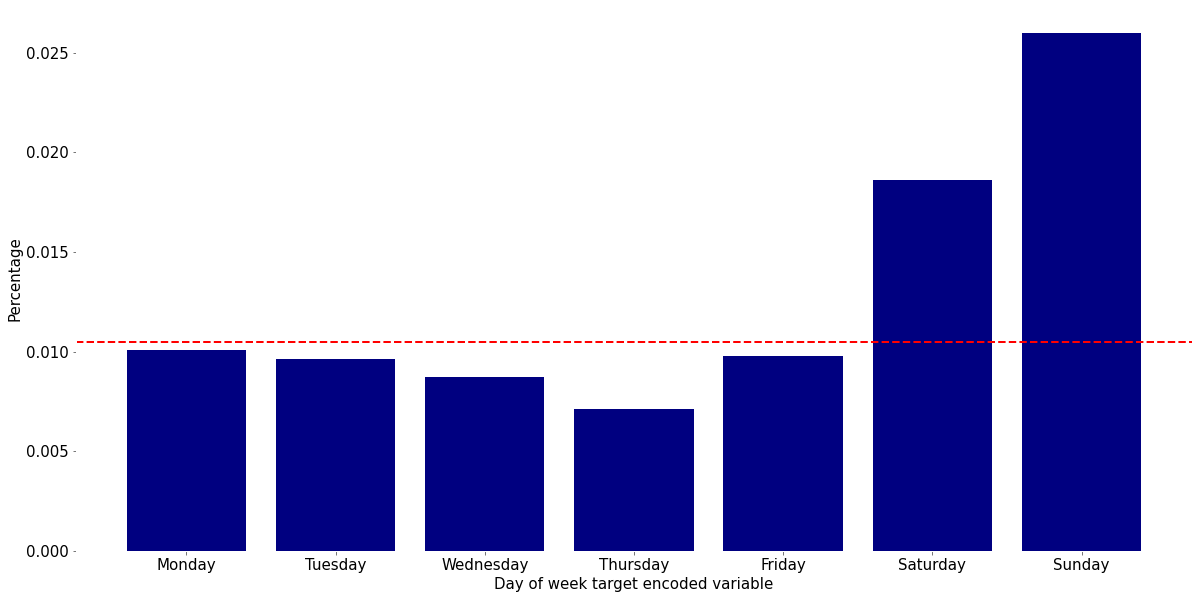

In [60]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (20,10))
ax.set_facecolor("white")
plt.bar(data = y_dow, x = y_dow.index,height = 'Fraud',color = 'navy')
#plt.title('Fraud Proportion of Each Weekday',fontsize = 18, color = 'black')
plt.xlabel('Day of week target encoded variable',fontsize = 15, color = 'black')
plt.xticks(fontsize = 15, color = 'black')
plt.yticks(fontsize = 15, color = 'black')
plt.ylabel('Percentage',fontsize = 15, color = 'black')
#plt.text(x=6,y=y_avg + 0.001,s='Avg Fraud Proportion',ha='center',va='top',fontsize = 18,color = 'yellow')
ax.set_ylim(bottom = 0)
ax.axhline (y = y_avg, ls = '--',lw = 2, color = 'red')
#for i, v in enumerate (y_dow.index):
#   ax.text(v,y_dow.loc[i,'Fraud'] + 0.0001,round(y_dow.loc[i,'Fraud'],5),
#          horizontalalignment = 'center',fontsize = 15)
plt.show()

In [61]:
train_test = df[df.Date <'2006-11-01']
c = 4; nmid = 20; y_avg = train_test['Fraud'].mean()
y_state = train_test.groupby('Merch state')['Fraud'].mean()
num = train_test.groupby('Merch state').size()
y_state_smooth = y_avg + (y_state - y_avg)/(1 + np.exp(-(num-nmid)/c))
df['state_risk'] = df['Merch state'].map(y_dow_smooth)
y_state = y_state.reset_index()
cats = list(df['Merch state'].unique())
y_state['Merch state'] = pd.Categorical(y_state['Merch state'], categories = cats, ordered = True)
y_state = y_state.sort_values('Merch state')
y_state = y_state.set_index('Merch state')
y_state = y_state.sort_values('Fraud', ascending = False)
y_state

,Fraud
Merch state,
IN,0.084388
UT,0.044099
OR,0.024634
OH,0.024563
NY,0.023879
...,...
RI,0.000000
Unknown,0.000000
MS,0.000000


In [62]:
y_state.index

CategoricalIndex(['IN', 'UT', 'OR', 'OH', 'NY', 'WA', 'NM', 'PA', 'DC', 'MD',
                  'CA', 'SD', 'VA', 'TX', 'TN', 'SC', 'AL', 'MI', 'NH', 'IL',
                  'CT', 'MA', 'NV', 'AZ', 'KS', 'OK', 'MN', 'NC', 'KY', 'NJ',
                  'FL', 'WI', 'GA', 'CO', 'MO', 'VT', 'ND', 'PR', 'AR', 'MB',
                  'IA', 'HI', 'WY', 'PQ', 'NS', 'AB', 'US', 'ON', 'LA', 'QC',
                  'AK', 'BC', 'DE', 'WV', 'ID', 'ME', 'NE', 'RI', 'Unknown',
                  'MS', 'MT', 'VI'],
                 categories=['TN', 'MA', 'MD', 'OH', 'GA', 'IL', 'TX', 'WA', ...], ordered=True, name='Merch state', dtype='category')

KeyError: 0

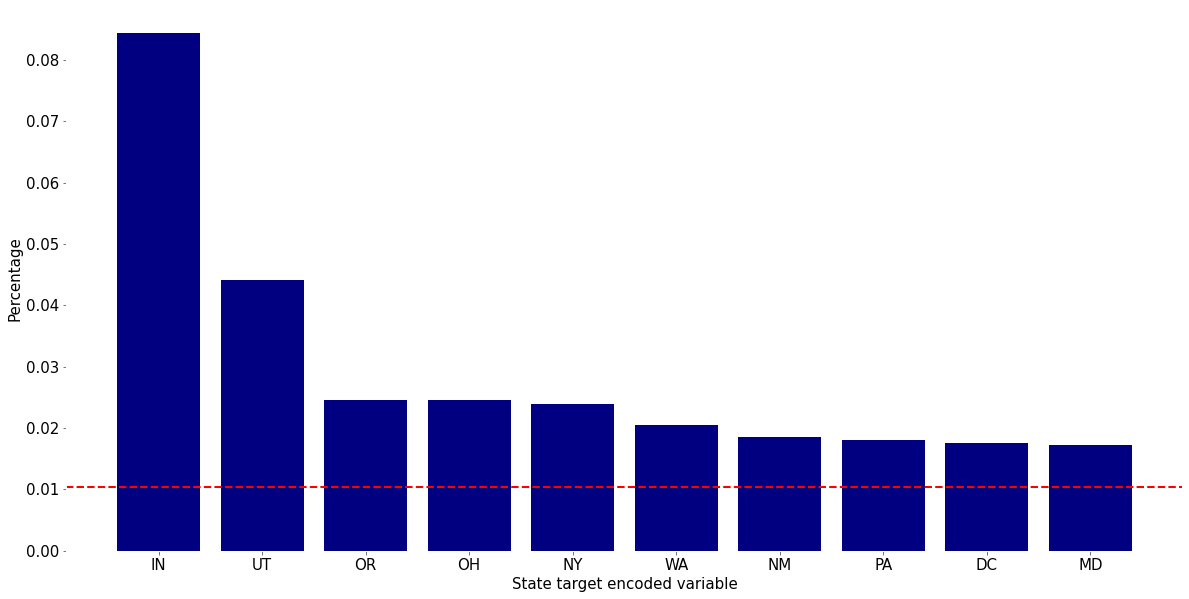

In [63]:
# plt.style.use('ggplot')
# fig, ax = plt.subplots(figsize = (20, 10))
# y_state = y_state.head(10)
# plt.bar(data = y_state, x = y_state.index, height = 'Fraud', color = 'darkblue')
# ax.set_ylim(bottom = 0.001)
# ax.axhline(y = y_avg, ls = '--', lw = 2)

# for i, v in enumerate(y_state.index):
#     ax.text(v, y_state.loc[i, 'Fraud']+0.0001, round(y_state.loc[i, 'Fraud'], 5),
#     horizontalalignment = 'center', fontsize = 15)
    
# plt.show()

import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (20,10))
ax.set_facecolor("white")
y_state = y_state.head(10)
plt.bar(data = y_state, x = y_state.index, height = 'Fraud',color = 'navy')
#plt.title('Fraud Proportion of Each Weekday',fontsize = 18, color = 'black')
plt.xlabel('State target encoded variable',fontsize = 15, color = 'black')
plt.xticks(fontsize = 15, color = 'black')
plt.yticks(fontsize = 15, color = 'black')
plt.ylabel('Percentage',fontsize = 15, color = 'black')
#plt.text(x=6,y=y_avg + 0.001,s='Avg Fraud Proportion',ha='center',va='top',fontsize = 18,color = 'yellow')
ax.set_ylim(bottom = 0)
ax.axhline (y = y_avg, ls = '--',lw = 2, color = 'red')
for i, v in enumerate(y_state.index):
    ax.text(v, y_state.loc[i, 'Fraud']+0.0001, round(y_state.loc[i, 'Fraud'], 5),
    horizontalalignment = 'center', fontsize = 15)
plt.show()


In [16]:
## benford's law variables
benford_df = data.copy()
benford_df = benford_df[benford_df['Merch description'].str.match(r'[Ff][Ee][Dd][Ee][Xx]') == False]
benford_df['Amount'] = benford_df['Amount'].astype('str')

In [17]:
benford_df['initial'] = [ i[0] for i in benford_df['Amount']]
benford_df['initial1-2'] = [1 if i in ['1','2'] else 0 for i in benford_df['initial']]
benford_df['initial3-9'] = [1 if i not in ['1','2'] else 0 for i in benford_df['initial']]

In [18]:
cardnums = benford_df.groupby('Cardnum').agg({'initial1-2':['sum'],'initial3-9':['sum']})
cardnums.columns = cardnums.columns.droplevel(1)
cardnums['n'] = cardnums['initial1-2'] + cardnums['initial3-9']
cardnums['initial1-2'].replace(0,1,inplace = True)
cardnums['initial3-9'].replace(0,1,inplace = True)

In [19]:
cardnums['R'] = 1.096 * cardnums['initial1-2']/cardnums['initial3-9']
cardnums['1/R'] = 1/cardnums['R'] 
cardnums['U'] = cardnums[['R','1/R']].max(axis=1)
cardnums['t'] = (cardnums['n'] - 15)/3
cardnums['U*'] = 1 + ((cardnums['U'] -1)/(1 + np.exp(-cardnums['t'])))

In [20]:
carddict = dict(zip(cardnums.index, cardnums['U*']))
benford_df['card_ben'] = benford_df['Cardnum'].map(carddict)
cardnums.sort_values('U*',ascending = False)[0:40].round(2).head()

,initial1-2,initial3-9,n,R,1/R,U,t,U*
Cardnum,,,,,,,,
5142253356,61,5,66,13.37,0.07,13.37,17.00,13.37
5142299705,25,3,28,9.13,0.11,9.13,4.33,9.03
5142197563,15,134,149,0.12,8.15,8.15,44.67,8.15
5142194617,5,33,38,0.17,6.02,6.02,7.67,6.02
5142288241,1,13,14,0.08,11.86,11.86,-0.33,5.53


In [21]:
merchnums = benford_df.groupby('Merchnum').agg({'initial1-2':['sum'],'initial3-9':['sum']})
merchnums.columns = merchnums.columns.droplevel(1)
merchnums['n'] = merchnums['initial1-2'] + merchnums['initial3-9']
merchnums['initial1-2'].replace(0,1,inplace = True)
merchnums['initial3-9'].replace(0,1,inplace = True)

merchnums['R'] = 1.096 * merchnums['initial1-2']/merchnums['initial3-9']
merchnums['1/R'] = 1/merchnums['R'] 
merchnums['U'] = merchnums[['R','1/R']].max(axis=1)
merchnums['t'] = (merchnums['n'] - 15)/3
merchnums['U*'] = 1 + ((merchnums['U'] -1)/(1 + np.exp(-merchnums['t'])))

In [22]:
merchdict = dict(zip(merchnums.index, merchnums['U*']))
benford_df['merch_ben'] = benford_df['Merchnum'].map(merchdict)
merchnums.sort_values('U*',ascending = False)[0:40].round(2).head()

,initial1-2,initial3-9,n,R,1/R,U,t,U*
Merchnum,,,,,,,,
991808369338,1,181,181,0.01,165.15,165.15,55.33,165.15
8078200641472,59,1,60,64.66,0.02,64.66,15.00,64.66
308904389335,1,53,53,0.02,48.36,48.36,12.67,48.36
3523000628102,34,1,34,37.26,0.03,37.26,6.33,37.20
808998385332,1,36,37,0.03,32.85,32.85,7.33,32.83


In [23]:
benford_df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,initial,initial1-2,initial3-9,card_ben,merch_ben
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,01803,P,31.42,0,3,0,1,1.604857,1.000894
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0,1,1,0,2.368143,1.025818
7,8,5142191182,2006-01-01,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429,P,230.32,0,2,1,0,1.520681,1.270492
8,9,5142258629,2006-01-01,602608969534,FISHER SCI ATL,GA,30091,P,62.11,0,6,0,1,1.231028,1.009322
13,14,5142124791,2006-01-01,5725000466504,CDW*GOVERNMENT INC,IL,60061,P,106.89,0,1,1,0,1.053846,1.252187


In [24]:
## creating entities
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,01803,P,31.42,0
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0


In [25]:
data['card_state'] = data['Cardnum'] + data['Merch state']
data['card_zip'] = data['Cardnum'] + data['Merch zip']
data['card_amount'] = data['Cardnum'] + data['Amount'].astype('str')
data['merch_amount'] = data['Merchnum'] + data['Amount'].astype('str')
data['card_merch'] = data['Cardnum'] + data['Merchnum']
data['merch_zip'] = data['Merchnum'] + data['Merch zip']
data['merch_state'] = data['Merchnum'] + data['Merch state']

In [26]:
data.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud',
       'card_state', 'card_zip', 'card_amount', 'merch_amount', 'card_merch',
       'merch_zip', 'merch_state'],
      dtype='object')

In [27]:
entities = [ 'Cardnum', 'Merchnum','card_state', 'card_zip', 'card_amount', 'merch_amount', 
            'card_merch', 'merch_zip', 'merch_state']

In [28]:
df1 = data.copy()
vars = data.copy()
df1['check_date'] = df1.Date
df1['check_record'] = df1.Recnum
vars = vars[['Recnum','Date','Fraud','Amount']]
print(vars.shape)

(96397, 4)


In [29]:
vars.head()

,Recnum,Date,Fraud,Amount
0,1,2006-01-01,0,3.62
1,2,2006-01-01,0,31.42
2,3,2006-01-01,0,178.49
3,4,2006-01-01,0,3.62
4,5,2006-01-01,0,3.62


# Day Since

In [30]:
## creating variables
for entity in entities:    
    ## Day-since variables:   
    df_l = df1[['Recnum', 'Date', entity]]
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]    
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)   
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']]\
                                                   .groupby('Recnum')[['Date', 'check_date']].last()
    mapper = (temp1.Date - temp1.check_date).dt.days
    vars[entity + '_day_since'] = vars.Recnum.map(mapper)
    vars[entity + '_day_since'].fillna((vars.Date - pd.to_datetime('2006-01-01')).dt.days, inplace = True)
    print('\n' + entity + '_day_since ---> Done')   
print(vars.shape)


Cardnum_day_since ---> Done

Merchnum_day_since ---> Done

card_state_day_since ---> Done

card_zip_day_since ---> Done

card_amount_day_since ---> Done

merch_amount_day_since ---> Done

card_merch_day_since ---> Done

merch_zip_day_since ---> Done

merch_state_day_since ---> Done
(96397, 13)


# Frequency

In [31]:
# frequency variables
from datetime import timedelta
for entity in entities: 
    df_l = df1[['Recnum', 'Date', entity]]
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]    
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)  
    for offset_t in [0,1,3,7,14,30]:
        count_day_df = temp[(temp.check_date >= (temp.Date - timedelta(offset_t)))
                           & (temp.Recnum >= temp.check_record)]
        col_name = f'{entity}_count_{offset_t}'
        mapper2 = count_day_df.groupby('Recnum')[entity].count()
        vars[col_name] = vars.Recnum.map(mapper2)
        print(f'{entity}_count_{str(offset_t)} ---> Done')
print(vars.shape)

Cardnum_count_0 ---> Done
Cardnum_count_1 ---> Done
Cardnum_count_3 ---> Done
Cardnum_count_7 ---> Done
Cardnum_count_14 ---> Done
Cardnum_count_30 ---> Done
Merchnum_count_0 ---> Done
Merchnum_count_1 ---> Done
Merchnum_count_3 ---> Done
Merchnum_count_7 ---> Done
Merchnum_count_14 ---> Done
Merchnum_count_30 ---> Done
card_state_count_0 ---> Done
card_state_count_1 ---> Done
card_state_count_3 ---> Done
card_state_count_7 ---> Done
card_state_count_14 ---> Done
card_state_count_30 ---> Done
card_zip_count_0 ---> Done
card_zip_count_1 ---> Done
card_zip_count_3 ---> Done
card_zip_count_7 ---> Done
card_zip_count_14 ---> Done
card_zip_count_30 ---> Done
card_amount_count_0 ---> Done
card_amount_count_1 ---> Done
card_amount_count_3 ---> Done
card_amount_count_7 ---> Done
card_amount_count_14 ---> Done
card_amount_count_30 ---> Done
merch_amount_count_0 ---> Done
merch_amount_count_1 ---> Done
merch_amount_count_3 ---> Done
merch_amount_count_7 ---> Done
merch_amount_count_14 ---> Done


# Velocity for number (count)

In [32]:
# velocity change variables
for entity in entities:
    for d in ['0','1']:
        for dd in ['3','7','14','30']:
            vars[entity + '_count_' + d + '_by_' + dd] \
            = vars[entity + '_count_' + d]/(vars[entity + '_count_' + dd]/float(dd))
print(vars.shape)

(96397, 139)


# Amount Variables

In [33]:
## amount variables
amount_entities =[ 'Cardnum', 'Merchnum','card_state', 'card_zip', 'card_merch', 'merch_zip', 'merch_state']
from datetime import timedelta
for entity in amount_entities: 
    df_l = df1[['Recnum', 'Date', entity]]
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]    
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)  
    for offset_t in [0,1,3,7,14,30]:
        count_day_df = temp[(temp.check_date >= (temp.Date - timedelta(offset_t)))
                           & (temp.Recnum >= temp.check_record)]
        vars[entity + '_avg_' + str(offset_t)] = vars.Recnum.map(count_day_df.groupby('Recnum')['Amount'].mean())
        vars[entity + '_max_' + str(offset_t)] = vars.Recnum.map(count_day_df.groupby('Recnum')['Amount'].max())
        vars[entity + '_med_' + str(offset_t)] = vars.Recnum.map(count_day_df.groupby('Recnum')['Amount'].median())
        vars[entity + '_total_' + str(offset_t)] = vars.Recnum.map(count_day_df.groupby('Recnum')['Amount'].sum())
        vars[entity + '_actual/avg_' + str(offset_t)] = vars['Amount'] / vars[entity + '_avg_' + str(offset_t)]
        vars[entity + '_actual/max_' + str(offset_t)] = vars['Amount'] / vars[entity + '_max_' + str(offset_t)]
        vars[entity + '_actual/med_' + str(offset_t)] = vars['Amount'] / vars[entity + '_med_' + str(offset_t)]
        vars[entity + '_actual/toal_' + str(offset_t)] = vars['Amount'] / vars[entity + '_total_' + str(offset_t)]      
    print(f'amount for {entity} done.')
print(vars.shape)

amount for Cardnum done.
amount for Merchnum done.
amount for card_state done.
amount for card_zip done.
amount for card_merch done.
amount for merch_zip done.
amount for merch_state done.
(96397, 475)


# Velocity for Amount

In [34]:
## amount velocity change variable
for entity in ['Cardnum', 'Merchnum']:
    for d in ['0','1']:
        for dd in ['3', '7','14','30']:
            vars[entity + '_avg_' + d + '_by_' + dd] \
            = vars[entity + '_avg_' + d]/(vars[entity + '_avg_' + dd]/float(dd))
print(vars.shape)

(96397, 491)


# Number of unique entity for a field

In [35]:
## unique_entities 
unique_entities  =[('Cardnum','Merchnum'),('Merchnum','Cardnum'),('Amount','Cardnum'),('Amount','Merchnum')]
for entity,field in unique_entities:
    df_c = df1[['Recnum','Date',entity]]
    df_d = df1[['check_record','check_date',entity,field]]
    temp = pd.merge(df_c,df_d,left_on = entity,right_on = entity)

    for offset_t in [0,1,3,7,14,30]:
        count_day_df = temp[(temp.check_date >= (temp.Date - timedelta(offset_t)))
                           & (temp.Recnum >= temp.check_record)]
        col_name = f'{entity}_unique_count_for_{field}_{offset_t}'
        mapper4 = count_day_df.groupby('Recnum')[field].nunique()
        vars[col_name] = vars.Recnum.map(mapper4)
print(vars.shape)

(96397, 515)


In [ ]:
371 - 4

In [31]:
vars.head()

,Recnum,Date,Fraud,Amount,Cardnum_day_since,Merchnum_day_since,card_state_day_since,card_zip_day_since,card_amount_day_since,merch_amount_day_since,...,Amount_unique_count_for_Cardnum_3,Amount_unique_count_for_Cardnum_7,Amount_unique_count_for_Cardnum_14,Amount_unique_count_for_Cardnum_30,Amount_unique_count_for_Merchnum_0,Amount_unique_count_for_Merchnum_1,Amount_unique_count_for_Merchnum_3,Amount_unique_count_for_Merchnum_7,Amount_unique_count_for_Merchnum_14,Amount_unique_count_for_Merchnum_30
0,1,2006-01-01,0,3.62,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
1,2,2006-01-01,0,31.42,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
2,3,2006-01-01,0,178.49,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
3,4,2006-01-01,0,3.62,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,2,2,1,1,1,1,1,1
4,5,2006-01-01,0,3.62,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,2,2,1,1,1,1,1,1


In [32]:
vars.shape

(96397, 515)

In [33]:
vars.to_csv('new_hw10vars.csv')

In [ ]:
merchnums.sort_values('U*',ascending = False)[0:40].round(2)

In [62]:
df = pd.read_csv('new_hw10vars.csv', index_col = 0)
df.head()

,Recnum,Date,Fraud,Amount,Cardnum_day_since,Merchnum_day_since,card_state_day_since,card_zip_day_since,card_amount_day_since,merch_amount_day_since,...,Amount_unique_count_for_Cardnum_3,Amount_unique_count_for_Cardnum_7,Amount_unique_count_for_Cardnum_14,Amount_unique_count_for_Cardnum_30,Amount_unique_count_for_Merchnum_0,Amount_unique_count_for_Merchnum_1,Amount_unique_count_for_Merchnum_3,Amount_unique_count_for_Merchnum_7,Amount_unique_count_for_Merchnum_14,Amount_unique_count_for_Merchnum_30
0,1,2006-01-01,0,3.62,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
1,2,2006-01-01,0,31.42,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
2,3,2006-01-01,0,178.49,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
3,4,2006-01-01,0,3.62,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,2,2,1,1,1,1,1,1
4,5,2006-01-01,0,3.62,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,2,2,1,1,1,1,1,1


In [63]:
df.shape

(96397, 515)

In [64]:
df.columns

Index(['Recnum', 'Date', 'Fraud', 'Amount', 'Cardnum_day_since',
       'Merchnum_day_since', 'card_state_day_since', 'card_zip_day_since',
       'card_amount_day_since', 'merch_amount_day_since',
       ...
       'Amount_unique_count_for_Cardnum_3',
       'Amount_unique_count_for_Cardnum_7',
       'Amount_unique_count_for_Cardnum_14',
       'Amount_unique_count_for_Cardnum_30',
       'Amount_unique_count_for_Merchnum_0',
       'Amount_unique_count_for_Merchnum_1',
       'Amount_unique_count_for_Merchnum_3',
       'Amount_unique_count_for_Merchnum_7',
       'Amount_unique_count_for_Merchnum_14',
       'Amount_unique_count_for_Merchnum_30'],
      dtype='object', length=515)